# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 10</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 3 - Guia de Modelagem Preditiva com Linguagem Python e TensorFlow

![title](imagens/mini-projeto3.png)

Neste Mini-Projeto vamos apresentar um guia básico de modelagem preditiva usando Linguagem Python e TensorFlow, o principal framework para construção de modelos de Machine Learning e Deep Learning e para construir aplicações comerciais de Inteligência Artificial.

Este é um guia básico pois o TensorFlow é um framework extenso. O TensorFlow é abordado em detalhes nos cursos da <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial">Formação Inteligência Artificial</a> (especialmente no curso Deep Learning Frameworks) e na <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial-aplicada-a-medicina">Formação IA Aplicada à Medicina</a>.

Na <a href="https://www.datascienceacademy.com.br/bundle/formacao-cientista-de-dados">Formação Cientista de Dados</a>, no curso de Machine Learning também há um módulo sobre TensorFlow. Alguns projetos com TensorFlow podem ser encontrados no curso de IA Aplicada a Finanças da <a href="https://www.datascienceacademy.com.br/bundle/formacao-engenheiro-blockchain">Formação Engenheiro Blockchain</a>.

## Instalando e Carregando Pacotes

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.10


In [3]:
!pip install numpy --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install tensorflow==2.7

In [28]:
# Instala o Pydot
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable


In [29]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2021-12-20 09:30:18.270454: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-20 09:30:18.270490: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.8.0-dev20211219


In [6]:
tf.__version__

'2.8.0-dev20211219'

## Carregando os Dados

### Boston House Prices Dataset

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

#### Características:

* Número de Observções: 506
* Os primeiros 13 recursos são recursos preditivos numéricos / categóricos. 
* O último (atributo 14): o valor mediano é a variável de destino.

In [7]:
# Download dos dados
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

In [8]:
# Nomes das colunas
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [9]:
# Carrega os dados
dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)

In [10]:
# Shape
dataset.shape

(506, 14)

In [11]:
# Visualiza os dados
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Vamos dividir os dados em treino e teste com proporção 80/20.

In [12]:
# Split dos dados
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

## Modelagem Preditiva - Regressão Linear Simples

Na regressão linear simples desejamos modelar a relação entre a variável dependente (y) e uma variável independente (x).

* Variável independente: 'RM'
* Variável dependente: 'MEDV'

Queremos prever o valor da mediana das casas ocupadas por proprietários com base no número de quartos.

Vamos criar um plot mostrando a relação atual entre as variáveis.

Basicamente temos $MEDV=f(RM)$ e queremos estimar a função $f()$ usando regressão linear.

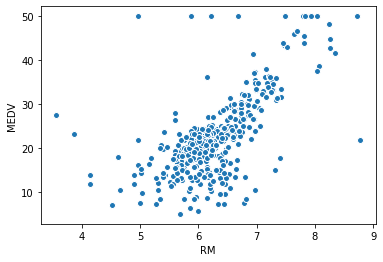

In [21]:
# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (1, 1, 1))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

Vamos separar x e y.

In [22]:
# Divisão
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

## Criação do Modelo

Queremos encontrar os parâmetros (**W**) que permitem prever a saída y a partir da entrada x:

$y = w_1 x + w_0$

A fórmula acima pode ser definida com a seguinte camada densa em um modelo de rede neural artificial:

*layers.Dense(1, use_bias=True, input_shape=(1,))*

In [24]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])

    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
    # Compila o modelo
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

MAE = Mean Absolute Error

MSE = Mean Squared Error

In [30]:
# Cria o modelo 
modelo = modelo_linear()

In [27]:
# Plot do modelo
tf.keras.utils.plot_model(modelo, 
                          to_file = 'imagens/modelo.png', 
                          show_shapes = True, 
                          show_layer_names = True,
                          rankdir = 'TB', 
                          expand_nested = False, 
                          dpi = 100)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


### Treinamento do Modelo

In [31]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

Checkpoint salvo a cada 81000 amostras


In [32]:
# Callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

In [33]:
# Lista para as previsões
predictions_list = []

In [34]:
# Caminho ppara salvar o checkpoint
checkpoint_path = "dados/"

In [35]:
# Create a callback that saves the model's weights every n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

In [36]:
# Salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [37]:
# Treinamento
history = modelo.fit(x_treino, 
                     y_treino, 
                     batch_size = batch_size,
                     epochs = n_epochs, 
                     validation_split = 0.1, 
                     verbose = 1, 
                     callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 2s 206ms/step - loss: 1118.1608 - mae: 32.0588 - mse: 1118.1608 - val_loss: 1231.6505 - val_mae: 33.3705 - val_mse: 1231.6505
Epoch 2/4000
2/2 [==============================] - 0s 41ms/step - loss: 1108.7006 - mae: 31.9135 - mse: 1108.7007 - val_loss: 1221.7826 - val_mae: 33.2246 - val_mse: 1221.7826
Epoch 3/4000
2/2 [==============================] - 0s 34ms/step - loss: 1099.1460 - mae: 31.7679 - mse: 1099.1461 - val_loss: 1211.9592 - val_mae: 33.0788 - val_mse: 1211.9592
Epoch 4/4000
2/2 [==============================] - 0s 37ms/step - loss: 1089.8936 - mae: 31.6230 - mse: 1089.8936 - val_loss: 1202.1799 - val_mae: 32.9330 - val_mse: 1202.1799
Epoch 5/4000
2/2 [==============================] - 0s 47ms/step - loss: 1080.4662 - mae: 31.4776 - mse: 1080.4662 - val_loss: 1192.4618 - val_mae: 32.7874 - val_mse: 1192.4618
Epoch 6/4000
2/2 [==============================] - 0s 35ms/step - loss: 1071.1769 - mae: 31.3327 - mse: 1071.1769

Epoch 48/4000
2/2 [==============================] - 0s 28ms/step - loss: 729.3690 - mae: 25.4460 - mse: 729.3690 - val_loss: 826.4394 - val_mae: 26.7409 - val_mse: 826.4394
Epoch 49/4000
2/2 [==============================] - 0s 33ms/step - loss: 722.4685 - mae: 25.3119 - mse: 722.4685 - val_loss: 819.1335 - val_mae: 26.6064 - val_mse: 819.1335
Epoch 50/4000
2/2 [==============================] - 0s 34ms/step - loss: 715.4946 - mae: 25.1777 - mse: 715.4946 - val_loss: 811.8893 - val_mae: 26.4723 - val_mse: 811.8893
Epoch 51/4000
2/2 [==============================] - 0s 32ms/step - loss: 708.6858 - mae: 25.0445 - mse: 708.6858 - val_loss: 804.6948 - val_mae: 26.3385 - val_mse: 804.6948
Epoch 52/4000
2/2 [==============================] - 0s 32ms/step - loss: 701.8792 - mae: 24.9112 - mse: 701.8792 - val_loss: 797.5667 - val_mae: 26.2053 - val_mse: 797.5667
Epoch 53/4000
2/2 [==============================] - 0s 29ms/step - loss: 695.0984 - mae: 24.7785 - mse: 695.0984 - val_loss: 790.

2/2 [==============================] - 0s 47ms/step - loss: 452.8530 - mae: 19.4401 - mse: 452.8530 - val_loss: 535.3145 - val_mae: 20.7227 - val_mse: 535.3145
Epoch 96/4000
2/2 [==============================] - 0s 34ms/step - loss: 448.0259 - mae: 19.3197 - mse: 448.0259 - val_loss: 530.2275 - val_mae: 20.6021 - val_mse: 530.2275
Epoch 97/4000
2/2 [==============================] - 0s 30ms/step - loss: 443.2275 - mae: 19.1993 - mse: 443.2275 - val_loss: 525.1711 - val_mae: 20.4815 - val_mse: 525.1711
Epoch 98/4000
2/2 [==============================] - 0s 37ms/step - loss: 438.5022 - mae: 19.0792 - mse: 438.5022 - val_loss: 520.1357 - val_mae: 20.3608 - val_mse: 520.1357
Epoch 99/4000
2/2 [==============================] - 0s 38ms/step - loss: 433.8365 - mae: 18.9592 - mse: 433.8365 - val_loss: 515.1295 - val_mae: 20.2400 - val_mse: 515.1295
Epoch 100/4000
2/2 [==============================] - 0s 35ms/step - loss: 429.1310 - mae: 18.8386 - mse: 429.1310 - val_loss: 510.1653 - val_ma

Epoch 142/4000
2/2 [==============================] - 0s 37ms/step - loss: 264.7702 - mae: 14.0428 - mse: 264.7702 - val_loss: 334.1823 - val_mae: 15.3210 - val_mse: 334.1823
Epoch 143/4000
2/2 [==============================] - 0s 37ms/step - loss: 261.5622 - mae: 13.9376 - mse: 261.5622 - val_loss: 330.7758 - val_mae: 15.2171 - val_mse: 330.7758
Epoch 144/4000
2/2 [==============================] - 0s 32ms/step - loss: 258.4381 - mae: 13.8332 - mse: 258.4381 - val_loss: 327.4004 - val_mae: 15.1134 - val_mse: 327.4004
Epoch 145/4000
2/2 [==============================] - 0s 32ms/step - loss: 255.3615 - mae: 13.7293 - mse: 255.3615 - val_loss: 324.0548 - val_mae: 15.0099 - val_mse: 324.0548
Epoch 146/4000
2/2 [==============================] - 0s 28ms/step - loss: 252.3003 - mae: 13.6248 - mse: 252.3003 - val_loss: 320.7426 - val_mae: 14.9067 - val_mse: 320.7426
Epoch 147/4000
2/2 [==============================] - 0s 29ms/step - loss: 249.2560 - mae: 13.5237 - mse: 249.2560 - val_loss

Epoch 189/4000
2/2 [==============================] - 0s 47ms/step - loss: 147.8511 - mae: 9.6837 - mse: 147.8511 - val_loss: 205.9980 - val_mae: 11.1333 - val_mse: 205.9980
Epoch 190/4000
2/2 [==============================] - 0s 39ms/step - loss: 146.0506 - mae: 9.6048 - mse: 146.0506 - val_loss: 203.9375 - val_mae: 11.0604 - val_mse: 203.9375
Epoch 191/4000
2/2 [==============================] - 0s 35ms/step - loss: 144.2455 - mae: 9.5267 - mse: 144.2455 - val_loss: 201.9080 - val_mae: 10.9879 - val_mse: 201.9080
Epoch 192/4000
2/2 [==============================] - 0s 42ms/step - loss: 142.4608 - mae: 9.4507 - mse: 142.4608 - val_loss: 199.9102 - val_mae: 10.9159 - val_mse: 199.9102
Epoch 193/4000
2/2 [==============================] - 0s 36ms/step - loss: 140.7011 - mae: 9.3747 - mse: 140.7011 - val_loss: 197.9415 - val_mae: 10.8443 - val_mse: 197.9415
Epoch 194/4000
2/2 [==============================] - 0s 34ms/step - loss: 138.9761 - mae: 9.3002 - mse: 138.9761 - val_loss: 195.

2/2 [==============================] - 0s 32ms/step - loss: 86.3582 - mae: 6.8997 - mse: 86.3582 - val_loss: 135.1026 - val_mae: 8.4185 - val_mse: 135.1026
Epoch 237/4000
2/2 [==============================] - 0s 33ms/step - loss: 85.5255 - mae: 6.8575 - mse: 85.5255 - val_loss: 134.0775 - val_mae: 8.3804 - val_mse: 134.0775
Epoch 238/4000
2/2 [==============================] - 0s 35ms/step - loss: 84.7226 - mae: 6.8153 - mse: 84.7226 - val_loss: 133.0754 - val_mae: 8.3428 - val_mse: 133.0754
Epoch 239/4000
2/2 [==============================] - 0s 40ms/step - loss: 83.8722 - mae: 6.7722 - mse: 83.8722 - val_loss: 132.1007 - val_mae: 8.3058 - val_mse: 132.1007
Epoch 240/4000
2/2 [==============================] - 0s 42ms/step - loss: 83.1208 - mae: 6.7326 - mse: 83.1208 - val_loss: 131.1394 - val_mae: 8.2688 - val_mse: 131.1394
Epoch 241/4000
2/2 [==============================] - 0s 33ms/step - loss: 82.3579 - mae: 6.6922 - mse: 82.3579 - val_loss: 130.2047 - val_mae: 8.2324 - val_mse

Epoch 284/4000
2/2 [==============================] - 0s 36ms/step - loss: 62.0424 - mae: 5.5402 - mse: 62.0424 - val_loss: 103.7237 - val_mae: 7.1457 - val_mse: 103.7237
Epoch 285/4000
2/2 [==============================] - 0s 33ms/step - loss: 61.8197 - mae: 5.5289 - mse: 61.8197 - val_loss: 103.3636 - val_mae: 7.1303 - val_mse: 103.3636
Epoch 286/4000
2/2 [==============================] - 0s 32ms/step - loss: 61.5992 - mae: 5.5149 - mse: 61.5992 - val_loss: 103.0172 - val_mae: 7.1153 - val_mse: 103.0172
Epoch 287/4000
2/2 [==============================] - 0s 27ms/step - loss: 61.3469 - mae: 5.5033 - mse: 61.3469 - val_loss: 102.6859 - val_mae: 7.1007 - val_mse: 102.6859
Epoch 288/4000
2/2 [==============================] - 0s 27ms/step - loss: 61.1566 - mae: 5.4922 - mse: 61.1566 - val_loss: 102.3578 - val_mae: 7.0872 - val_mse: 102.3578
Epoch 289/4000
2/2 [==============================] - 0s 28ms/step - loss: 60.9397 - mae: 5.4803 - mse: 60.9397 - val_loss: 102.0427 - val_mae: 7

2/2 [==============================] - 0s 31ms/step - loss: 56.7996 - mae: 5.3359 - mse: 56.7996 - val_loss: 94.4072 - val_mae: 6.8761 - val_mse: 94.4072
Epoch 333/4000
2/2 [==============================] - 0s 30ms/step - loss: 56.7702 - mae: 5.3361 - mse: 56.7702 - val_loss: 94.3330 - val_mae: 6.8757 - val_mse: 94.3330
Epoch 334/4000
2/2 [==============================] - 0s 27ms/step - loss: 56.7507 - mae: 5.3371 - mse: 56.7507 - val_loss: 94.2584 - val_mae: 6.8753 - val_mse: 94.2584
Epoch 335/4000
2/2 [==============================] - 0s 31ms/step - loss: 56.7199 - mae: 5.3377 - mse: 56.7199 - val_loss: 94.1864 - val_mae: 6.8749 - val_mse: 94.1864
Epoch 336/4000
2/2 [==============================] - 0s 36ms/step - loss: 56.7057 - mae: 5.3388 - mse: 56.7057 - val_loss: 94.1121 - val_mae: 6.8745 - val_mse: 94.1121
Epoch 337/4000
2/2 [==============================] - 0s 39ms/step - loss: 56.6859 - mae: 5.3401 - mse: 56.6859 - val_loss: 94.0437 - val_mae: 6.8741 - val_mse: 94.0437
E

2/2 [==============================] - 0s 30ms/step - loss: 56.3879 - mae: 5.3804 - mse: 56.3879 - val_loss: 92.8018 - val_mae: 6.8636 - val_mse: 92.8018
Epoch 381/4000
2/2 [==============================] - 0s 35ms/step - loss: 56.3877 - mae: 5.3806 - mse: 56.3877 - val_loss: 92.7973 - val_mae: 6.8635 - val_mse: 92.7973
Epoch 382/4000
2/2 [==============================] - 0s 30ms/step - loss: 56.3829 - mae: 5.3804 - mse: 56.3829 - val_loss: 92.8018 - val_mae: 6.8634 - val_mse: 92.8018
Epoch 383/4000
2/2 [==============================] - 0s 29ms/step - loss: 56.3807 - mae: 5.3798 - mse: 56.3807 - val_loss: 92.8086 - val_mae: 6.8633 - val_mse: 92.8086
Epoch 384/4000
2/2 [==============================] - 0s 36ms/step - loss: 56.3789 - mae: 5.3791 - mse: 56.3789 - val_loss: 92.8162 - val_mae: 6.8633 - val_mse: 92.8162
Epoch 385/4000
2/2 [==============================] - 0s 29ms/step - loss: 56.3766 - mae: 5.3785 - mse: 56.3766 - val_loss: 92.8217 - val_mae: 6.8632 - val_mse: 92.8217
E

2/2 [==============================] - 0s 33ms/step - loss: 56.2470 - mae: 5.3757 - mse: 56.2470 - val_loss: 92.6619 - val_mae: 6.8559 - val_mse: 92.6619
Epoch 429/4000
2/2 [==============================] - 0s 31ms/step - loss: 56.2425 - mae: 5.3748 - mse: 56.2425 - val_loss: 92.6775 - val_mae: 6.8558 - val_mse: 92.6775
Epoch 430/4000
2/2 [==============================] - 0s 41ms/step - loss: 56.2389 - mae: 5.3732 - mse: 56.2389 - val_loss: 92.6944 - val_mae: 6.8557 - val_mse: 92.6944
Epoch 431/4000
2/2 [==============================] - 0s 29ms/step - loss: 56.2366 - mae: 5.3718 - mse: 56.2366 - val_loss: 92.7121 - val_mae: 6.8557 - val_mse: 92.7121
Epoch 432/4000
2/2 [==============================] - 0s 32ms/step - loss: 56.2347 - mae: 5.3703 - mse: 56.2347 - val_loss: 92.7257 - val_mae: 6.8556 - val_mse: 92.7257
Epoch 433/4000
2/2 [==============================] - 0s 33ms/step - loss: 56.2310 - mae: 5.3693 - mse: 56.2310 - val_loss: 92.7313 - val_mae: 6.8554 - val_mse: 92.7313
E

2/2 [==============================] - 0s 42ms/step - loss: 56.0344 - mae: 5.3641 - mse: 56.0344 - val_loss: 92.4924 - val_mae: 6.8443 - val_mse: 92.4924
Epoch 477/4000
2/2 [==============================] - 0s 39ms/step - loss: 56.0301 - mae: 5.3641 - mse: 56.0301 - val_loss: 92.4884 - val_mae: 6.8441 - val_mse: 92.4884
Epoch 478/4000
2/2 [==============================] - 0s 50ms/step - loss: 56.0233 - mae: 5.3635 - mse: 56.0233 - val_loss: 92.4945 - val_mae: 6.8438 - val_mse: 92.4945
Epoch 479/4000
2/2 [==============================] - 0s 39ms/step - loss: 56.0184 - mae: 5.3625 - mse: 56.0184 - val_loss: 92.5040 - val_mae: 6.8436 - val_mse: 92.5040
Epoch 480/4000
2/2 [==============================] - 0s 47ms/step - loss: 56.0130 - mae: 5.3613 - mse: 56.0130 - val_loss: 92.5144 - val_mae: 6.8434 - val_mse: 92.5144
Epoch 481/4000
2/2 [==============================] - 0s 39ms/step - loss: 56.0081 - mae: 5.3601 - mse: 56.0081 - val_loss: 92.5290 - val_mae: 6.8432 - val_mse: 92.5290
E

2/2 [==============================] - 0s 31ms/step - loss: 55.7379 - mae: 5.3433 - mse: 55.7379 - val_loss: 92.3479 - val_mae: 6.8286 - val_mse: 92.3479
Epoch 525/4000
2/2 [==============================] - 0s 30ms/step - loss: 55.7315 - mae: 5.3425 - mse: 55.7315 - val_loss: 92.3462 - val_mae: 6.8283 - val_mse: 92.3462
Epoch 526/4000
2/2 [==============================] - 0s 34ms/step - loss: 55.7243 - mae: 5.3419 - mse: 55.7243 - val_loss: 92.3372 - val_mae: 6.8278 - val_mse: 92.3372
Epoch 527/4000
2/2 [==============================] - 0s 28ms/step - loss: 55.7203 - mae: 5.3423 - mse: 55.7203 - val_loss: 92.3238 - val_mae: 6.8274 - val_mse: 92.3238
Epoch 528/4000
2/2 [==============================] - 0s 35ms/step - loss: 55.7099 - mae: 5.3418 - mse: 55.7099 - val_loss: 92.3265 - val_mae: 6.8270 - val_mse: 92.3265
Epoch 529/4000
2/2 [==============================] - 0s 40ms/step - loss: 55.7024 - mae: 5.3410 - mse: 55.7024 - val_loss: 92.3188 - val_mae: 6.8266 - val_mse: 92.3188
E

2/2 [==============================] - 0s 28ms/step - loss: 55.3518 - mae: 5.3193 - mse: 55.3518 - val_loss: 92.1098 - val_mae: 6.8075 - val_mse: 92.1098
Epoch 573/4000
2/2 [==============================] - 0s 31ms/step - loss: 55.3417 - mae: 5.3185 - mse: 55.3417 - val_loss: 92.0945 - val_mae: 6.8070 - val_mse: 92.0945
Epoch 574/4000
2/2 [==============================] - 0s 36ms/step - loss: 55.3336 - mae: 5.3184 - mse: 55.3336 - val_loss: 92.0767 - val_mae: 6.8064 - val_mse: 92.0767
Epoch 575/4000
2/2 [==============================] - 0s 30ms/step - loss: 55.3218 - mae: 5.3188 - mse: 55.3218 - val_loss: 92.0327 - val_mae: 6.8056 - val_mse: 92.0327
Epoch 576/4000
2/2 [==============================] - 0s 31ms/step - loss: 55.3097 - mae: 5.3202 - mse: 55.3097 - val_loss: 91.9821 - val_mae: 6.8049 - val_mse: 91.9821
Epoch 577/4000
2/2 [==============================] - 0s 33ms/step - loss: 55.3058 - mae: 5.3231 - mse: 55.3058 - val_loss: 91.9244 - val_mae: 6.8040 - val_mse: 91.9244
E

2/2 [==============================] - 0s 43ms/step - loss: 54.9139 - mae: 5.3253 - mse: 54.9139 - val_loss: 91.3424 - val_mae: 6.7792 - val_mse: 91.3424
Epoch 621/4000
2/2 [==============================] - 0s 44ms/step - loss: 54.8981 - mae: 5.3229 - mse: 54.8981 - val_loss: 91.3579 - val_mae: 6.7788 - val_mse: 91.3579
Epoch 622/4000
2/2 [==============================] - 0s 39ms/step - loss: 54.8845 - mae: 5.3201 - mse: 54.8845 - val_loss: 91.3980 - val_mae: 6.7786 - val_mse: 91.3980
Epoch 623/4000
2/2 [==============================] - 0s 34ms/step - loss: 54.8673 - mae: 5.3155 - mse: 54.8673 - val_loss: 91.4516 - val_mae: 6.7785 - val_mse: 91.4516
Epoch 624/4000
2/2 [==============================] - 0s 37ms/step - loss: 54.8652 - mae: 5.3102 - mse: 54.8652 - val_loss: 91.5216 - val_mae: 6.7785 - val_mse: 91.5216
Epoch 625/4000
2/2 [==============================] - 0s 50ms/step - loss: 54.8535 - mae: 5.3041 - mse: 54.8535 - val_loss: 91.5591 - val_mae: 6.7783 - val_mse: 91.5591
E

2/2 [==============================] - 0s 35ms/step - loss: 54.4378 - mae: 5.2888 - mse: 54.4378 - val_loss: 91.0874 - val_mae: 6.7536 - val_mse: 91.0874
Epoch 669/4000
2/2 [==============================] - 0s 31ms/step - loss: 54.4301 - mae: 5.2907 - mse: 54.4301 - val_loss: 91.0688 - val_mae: 6.7530 - val_mse: 91.0688
Epoch 670/4000
2/2 [==============================] - 0s 32ms/step - loss: 54.4218 - mae: 5.2910 - mse: 54.4218 - val_loss: 91.0728 - val_mae: 6.7526 - val_mse: 91.0728
Epoch 671/4000
2/2 [==============================] - 0s 29ms/step - loss: 54.4153 - mae: 5.2891 - mse: 54.4153 - val_loss: 91.0936 - val_mae: 6.7523 - val_mse: 91.0936
Epoch 672/4000
2/2 [==============================] - 0s 27ms/step - loss: 54.3994 - mae: 5.2869 - mse: 54.3994 - val_loss: 91.0993 - val_mae: 6.7518 - val_mse: 91.0993
Epoch 673/4000
2/2 [==============================] - 0s 29ms/step - loss: 54.3905 - mae: 5.2851 - mse: 54.3905 - val_loss: 91.1141 - val_mae: 6.7515 - val_mse: 91.1141
E

2/2 [==============================] - 0s 29ms/step - loss: 53.9887 - mae: 5.2563 - mse: 53.9887 - val_loss: 90.8886 - val_mae: 6.7291 - val_mse: 90.8886
Epoch 717/4000
2/2 [==============================] - 0s 28ms/step - loss: 53.9804 - mae: 5.2565 - mse: 53.9804 - val_loss: 90.8769 - val_mae: 6.7285 - val_mse: 90.8769
Epoch 718/4000
2/2 [==============================] - 0s 31ms/step - loss: 53.9716 - mae: 5.2562 - mse: 53.9716 - val_loss: 90.8783 - val_mae: 6.7280 - val_mse: 90.8783
Epoch 719/4000
2/2 [==============================] - 0s 35ms/step - loss: 53.9610 - mae: 5.2549 - mse: 53.9610 - val_loss: 90.8960 - val_mae: 6.7277 - val_mse: 90.8960
Epoch 720/4000
2/2 [==============================] - 0s 27ms/step - loss: 53.9525 - mae: 5.2526 - mse: 53.9525 - val_loss: 90.9136 - val_mae: 6.7273 - val_mse: 90.9136
Epoch 721/4000
2/2 [==============================] - 0s 28ms/step - loss: 53.9415 - mae: 5.2506 - mse: 53.9415 - val_loss: 90.9237 - val_mae: 6.7269 - val_mse: 90.9237
E

2/2 [==============================] - 0s 33ms/step - loss: 53.5329 - mae: 5.2315 - mse: 53.5329 - val_loss: 90.5058 - val_mae: 6.7023 - val_mse: 90.5058
Epoch 765/4000
2/2 [==============================] - 0s 30ms/step - loss: 53.5427 - mae: 5.2361 - mse: 53.5427 - val_loss: 90.4458 - val_mae: 6.7013 - val_mse: 90.4458
Epoch 766/4000
2/2 [==============================] - 0s 31ms/step - loss: 53.5287 - mae: 5.2383 - mse: 53.5287 - val_loss: 90.4234 - val_mae: 6.7007 - val_mse: 90.4234
Epoch 767/4000
2/2 [==============================] - 0s 26ms/step - loss: 53.5208 - mae: 5.2395 - mse: 53.5208 - val_loss: 90.3896 - val_mae: 6.7000 - val_mse: 90.3896
Epoch 768/4000
2/2 [==============================] - 0s 27ms/step - loss: 53.5164 - mae: 5.2414 - mse: 53.5164 - val_loss: 90.3724 - val_mae: 6.6994 - val_mse: 90.3724
Epoch 769/4000
2/2 [==============================] - 0s 30ms/step - loss: 53.5076 - mae: 5.2413 - mse: 53.5076 - val_loss: 90.3793 - val_mae: 6.6990 - val_mse: 90.3793
E

2/2 [==============================] - 0s 29ms/step - loss: 53.1203 - mae: 5.1908 - mse: 53.1203 - val_loss: 90.5364 - val_mae: 6.6797 - val_mse: 90.5364
Epoch 813/4000
2/2 [==============================] - 0s 28ms/step - loss: 53.1224 - mae: 5.1895 - mse: 53.1224 - val_loss: 90.5177 - val_mae: 6.6791 - val_mse: 90.5177
Epoch 814/4000
2/2 [==============================] - 0s 29ms/step - loss: 53.1031 - mae: 5.1904 - mse: 53.1031 - val_loss: 90.4427 - val_mae: 6.6781 - val_mse: 90.4427
Epoch 815/4000
2/2 [==============================] - 0s 30ms/step - loss: 53.0944 - mae: 5.1939 - mse: 53.0944 - val_loss: 90.3854 - val_mae: 6.6773 - val_mse: 90.3854
Epoch 816/4000
2/2 [==============================] - 0s 32ms/step - loss: 53.0811 - mae: 5.1961 - mse: 53.0811 - val_loss: 90.3432 - val_mae: 6.6765 - val_mse: 90.3432
Epoch 817/4000
2/2 [==============================] - 0s 35ms/step - loss: 53.0746 - mae: 5.1984 - mse: 53.0746 - val_loss: 90.2837 - val_mae: 6.6756 - val_mse: 90.2837
E

2/2 [==============================] - 0s 34ms/step - loss: 52.7008 - mae: 5.1684 - mse: 52.7008 - val_loss: 90.2595 - val_mae: 6.6549 - val_mse: 90.2595
Epoch 861/4000
2/2 [==============================] - 0s 38ms/step - loss: 52.7074 - mae: 5.1643 - mse: 52.7074 - val_loss: 90.3301 - val_mae: 6.6549 - val_mse: 90.3301
Epoch 862/4000
2/2 [==============================] - 0s 38ms/step - loss: 52.6955 - mae: 5.1605 - mse: 52.6955 - val_loss: 90.3553 - val_mae: 6.6546 - val_mse: 90.3553
Epoch 863/4000
2/2 [==============================] - 0s 33ms/step - loss: 52.6889 - mae: 5.1588 - mse: 52.6889 - val_loss: 90.3577 - val_mae: 6.6541 - val_mse: 90.3577
Epoch 864/4000
2/2 [==============================] - 0s 38ms/step - loss: 52.6823 - mae: 5.1582 - mse: 52.6823 - val_loss: 90.3447 - val_mae: 6.6535 - val_mse: 90.3447
Epoch 865/4000
2/2 [==============================] - 0s 36ms/step - loss: 52.6726 - mae: 5.1581 - mse: 52.6726 - val_loss: 90.3330 - val_mae: 6.6530 - val_mse: 90.3330
E

2/2 [==============================] - 0s 32ms/step - loss: 52.2840 - mae: 5.1389 - mse: 52.2840 - val_loss: 89.9959 - val_mae: 6.6290 - val_mse: 89.9959
Epoch 909/4000
2/2 [==============================] - 0s 39ms/step - loss: 52.2753 - mae: 5.1382 - mse: 52.2753 - val_loss: 89.9905 - val_mae: 6.6284 - val_mse: 89.9905
Epoch 910/4000
2/2 [==============================] - 0s 33ms/step - loss: 52.2698 - mae: 5.1375 - mse: 52.2698 - val_loss: 89.9675 - val_mae: 6.6278 - val_mse: 89.9675
Epoch 911/4000
2/2 [==============================] - 0s 36ms/step - loss: 52.2535 - mae: 5.1379 - mse: 52.2535 - val_loss: 89.8965 - val_mae: 6.6268 - val_mse: 89.8965
Epoch 912/4000
2/2 [==============================] - 0s 37ms/step - loss: 52.2426 - mae: 5.1414 - mse: 52.2426 - val_loss: 89.8153 - val_mae: 6.6257 - val_mse: 89.8153
Epoch 913/4000
2/2 [==============================] - 0s 32ms/step - loss: 52.2312 - mae: 5.1450 - mse: 52.2312 - val_loss: 89.7384 - val_mae: 6.6246 - val_mse: 89.7384
E

2/2 [==============================] - 0s 31ms/step - loss: 51.8578 - mae: 5.1154 - mse: 51.8578 - val_loss: 89.6792 - val_mae: 6.6022 - val_mse: 89.6792
Epoch 957/4000
2/2 [==============================] - 0s 32ms/step - loss: 51.8487 - mae: 5.1137 - mse: 51.8487 - val_loss: 89.7042 - val_mae: 6.6019 - val_mse: 89.7042
Epoch 958/4000
2/2 [==============================] - 0s 32ms/step - loss: 51.8442 - mae: 5.1118 - mse: 51.8442 - val_loss: 89.7188 - val_mae: 6.6015 - val_mse: 89.7188
Epoch 959/4000
2/2 [==============================] - 0s 27ms/step - loss: 51.8379 - mae: 5.1107 - mse: 51.8379 - val_loss: 89.7148 - val_mae: 6.6010 - val_mse: 89.7148
Epoch 960/4000
2/2 [==============================] - 0s 30ms/step - loss: 51.8288 - mae: 5.1098 - mse: 51.8288 - val_loss: 89.7226 - val_mae: 6.6006 - val_mse: 89.7226
Epoch 961/4000
2/2 [==============================] - 0s 27ms/step - loss: 51.8211 - mae: 5.1091 - mse: 51.8211 - val_loss: 89.7104 - val_mae: 6.6001 - val_mse: 89.7104
E

2/2 [==============================] - 0s 29ms/step - loss: 51.4576 - mae: 5.0851 - mse: 51.4576 - val_loss: 89.4943 - val_mae: 6.5770 - val_mse: 89.4943
Epoch 1005/4000
2/2 [==============================] - 0s 31ms/step - loss: 51.4518 - mae: 5.0855 - mse: 51.4518 - val_loss: 89.4627 - val_mae: 6.5762 - val_mse: 89.4627
Epoch 1006/4000
2/2 [==============================] - 0s 32ms/step - loss: 51.4378 - mae: 5.0856 - mse: 51.4378 - val_loss: 89.4490 - val_mae: 6.5756 - val_mse: 89.4490
Epoch 1007/4000
2/2 [==============================] - 0s 29ms/step - loss: 51.4351 - mae: 5.0855 - mse: 51.4351 - val_loss: 89.4173 - val_mae: 6.5749 - val_mse: 89.4173
Epoch 1008/4000
2/2 [==============================] - 0s 50ms/step - loss: 51.4239 - mae: 5.0878 - mse: 51.4239 - val_loss: 89.3337 - val_mae: 6.5738 - val_mse: 89.3337
Epoch 1009/4000
2/2 [==============================] - 0s 32ms/step - loss: 51.4084 - mae: 5.0900 - mse: 51.4084 - val_loss: 89.2818 - val_mae: 6.5729 - val_mse: 89.2

2/2 [==============================] - 0s 31ms/step - loss: 51.0462 - mae: 5.0749 - mse: 51.0462 - val_loss: 88.9621 - val_mae: 6.5491 - val_mse: 88.9621
Epoch 1053/4000
2/2 [==============================] - 0s 30ms/step - loss: 51.0375 - mae: 5.0732 - mse: 51.0375 - val_loss: 88.9848 - val_mae: 6.5487 - val_mse: 88.9848
Epoch 1054/4000
2/2 [==============================] - 0s 32ms/step - loss: 51.0299 - mae: 5.0712 - mse: 51.0299 - val_loss: 89.0185 - val_mae: 6.5485 - val_mse: 89.0185
Epoch 1055/4000
2/2 [==============================] - 0s 35ms/step - loss: 51.0225 - mae: 5.0681 - mse: 51.0225 - val_loss: 89.0463 - val_mae: 6.5482 - val_mse: 89.0463
Epoch 1056/4000
2/2 [==============================] - 0s 30ms/step - loss: 51.0152 - mae: 5.0662 - mse: 51.0152 - val_loss: 89.0577 - val_mae: 6.5478 - val_mse: 89.0577
Epoch 1057/4000
2/2 [==============================] - 0s 27ms/step - loss: 51.0077 - mae: 5.0649 - mse: 51.0077 - val_loss: 89.0477 - val_mae: 6.5472 - val_mse: 89.0

2/2 [==============================] - 0s 29ms/step - loss: 50.6543 - mae: 5.0458 - mse: 50.6543 - val_loss: 88.7001 - val_mae: 6.5234 - val_mse: 88.7001
Epoch 1101/4000
2/2 [==============================] - 0s 47ms/step - loss: 50.6464 - mae: 5.0498 - mse: 50.6464 - val_loss: 88.6168 - val_mae: 6.5224 - val_mse: 88.6168
Epoch 1102/4000
2/2 [==============================] - 0s 30ms/step - loss: 50.6538 - mae: 5.0541 - mse: 50.6538 - val_loss: 88.5426 - val_mae: 6.5213 - val_mse: 88.5426
Epoch 1103/4000
2/2 [==============================] - 0s 38ms/step - loss: 50.6436 - mae: 5.0573 - mse: 50.6436 - val_loss: 88.5085 - val_mae: 6.5210 - val_mse: 88.5085
Epoch 1104/4000
2/2 [==============================] - 0s 29ms/step - loss: 50.6385 - mae: 5.0586 - mse: 50.6385 - val_loss: 88.4944 - val_mae: 6.5207 - val_mse: 88.4944
Epoch 1105/4000
2/2 [==============================] - 0s 34ms/step - loss: 50.6305 - mae: 5.0583 - mse: 50.6305 - val_loss: 88.4996 - val_mae: 6.5200 - val_mse: 88.4

2/2 [==============================] - 0s 33ms/step - loss: 50.3060 - mae: 5.0397 - mse: 50.3060 - val_loss: 88.3048 - val_mae: 6.4984 - val_mse: 88.3048
Epoch 1149/4000
2/2 [==============================] - 0s 32ms/step - loss: 50.3004 - mae: 5.0346 - mse: 50.3004 - val_loss: 88.3865 - val_mae: 6.4977 - val_mse: 88.3865
Epoch 1150/4000
2/2 [==============================] - 0s 30ms/step - loss: 50.2792 - mae: 5.0292 - mse: 50.2792 - val_loss: 88.4422 - val_mae: 6.4977 - val_mse: 88.4422
Epoch 1151/4000
2/2 [==============================] - 0s 29ms/step - loss: 50.2732 - mae: 5.0248 - mse: 50.2732 - val_loss: 88.4903 - val_mae: 6.4975 - val_mse: 88.4903
Epoch 1152/4000
2/2 [==============================] - 0s 32ms/step - loss: 50.2657 - mae: 5.0217 - mse: 50.2657 - val_loss: 88.5148 - val_mae: 6.4972 - val_mse: 88.5148
Epoch 1153/4000
2/2 [==============================] - 0s 28ms/step - loss: 50.2559 - mae: 5.0200 - mse: 50.2559 - val_loss: 88.5177 - val_mae: 6.4968 - val_mse: 88.5

2/2 [==============================] - 0s 35ms/step - loss: 49.9556 - mae: 4.9939 - mse: 49.9556 - val_loss: 88.4562 - val_mae: 6.4767 - val_mse: 88.4562
Epoch 1197/4000
2/2 [==============================] - 0s 29ms/step - loss: 49.9493 - mae: 4.9933 - mse: 49.9493 - val_loss: 88.4511 - val_mae: 6.4762 - val_mse: 88.4511
Epoch 1198/4000
2/2 [==============================] - 0s 29ms/step - loss: 49.9414 - mae: 4.9929 - mse: 49.9414 - val_loss: 88.4375 - val_mae: 6.4757 - val_mse: 88.4375
Epoch 1199/4000
2/2 [==============================] - 0s 32ms/step - loss: 49.9344 - mae: 4.9930 - mse: 49.9344 - val_loss: 88.4121 - val_mae: 6.4751 - val_mse: 88.4121
Epoch 1200/4000
2/2 [==============================] - 0s 28ms/step - loss: 49.9258 - mae: 4.9933 - mse: 49.9258 - val_loss: 88.3781 - val_mae: 6.4744 - val_mse: 88.3781
Epoch 1201/4000
2/2 [==============================] - 0s 27ms/step - loss: 49.9182 - mae: 4.9948 - mse: 49.9182 - val_loss: 88.3240 - val_mae: 6.4735 - val_mse: 88.3

2/2 [==============================] - 0s 37ms/step - loss: 49.6158 - mae: 4.9785 - mse: 49.6158 - val_loss: 88.1008 - val_mae: 6.4523 - val_mse: 88.1008
Epoch 1245/4000
2/2 [==============================] - 0s 33ms/step - loss: 49.6131 - mae: 4.9789 - mse: 49.6131 - val_loss: 88.0819 - val_mae: 6.4517 - val_mse: 88.0819
Epoch 1246/4000
2/2 [==============================] - 0s 31ms/step - loss: 49.6009 - mae: 4.9786 - mse: 49.6009 - val_loss: 88.0928 - val_mae: 6.4513 - val_mse: 88.0928
Epoch 1247/4000
2/2 [==============================] - 0s 28ms/step - loss: 49.5984 - mae: 4.9776 - mse: 49.5984 - val_loss: 88.1008 - val_mae: 6.4509 - val_mse: 88.1008
Epoch 1248/4000
2/2 [==============================] - 0s 29ms/step - loss: 49.5875 - mae: 4.9764 - mse: 49.5875 - val_loss: 88.0791 - val_mae: 6.4503 - val_mse: 88.0791
Epoch 1249/4000
2/2 [==============================] - 0s 29ms/step - loss: 49.5829 - mae: 4.9774 - mse: 49.5829 - val_loss: 88.0538 - val_mae: 6.4497 - val_mse: 88.0

2/2 [==============================] - 0s 34ms/step - loss: 49.2888 - mae: 4.9594 - mse: 49.2888 - val_loss: 87.9222 - val_mae: 6.4298 - val_mse: 87.9222
Epoch 1293/4000
2/2 [==============================] - 0s 28ms/step - loss: 49.2852 - mae: 4.9554 - mse: 49.2852 - val_loss: 87.9976 - val_mae: 6.4329 - val_mse: 87.9976
Epoch 1294/4000
2/2 [==============================] - 0s 29ms/step - loss: 49.2863 - mae: 4.9518 - mse: 49.2863 - val_loss: 88.0572 - val_mae: 6.4352 - val_mse: 88.0572
Epoch 1295/4000
2/2 [==============================] - 0s 31ms/step - loss: 49.2809 - mae: 4.9489 - mse: 49.2809 - val_loss: 88.0841 - val_mae: 6.4361 - val_mse: 88.0841
Epoch 1296/4000
2/2 [==============================] - 0s 34ms/step - loss: 49.2837 - mae: 4.9478 - mse: 49.2837 - val_loss: 88.0832 - val_mae: 6.4359 - val_mse: 88.0832
Epoch 1297/4000
2/2 [==============================] - 0s 31ms/step - loss: 49.2702 - mae: 4.9475 - mse: 49.2702 - val_loss: 88.0289 - val_mae: 6.4335 - val_mse: 88.0

2/2 [==============================] - 0s 33ms/step - loss: 48.9672 - mae: 4.9371 - mse: 48.9672 - val_loss: 87.7081 - val_mae: 6.4123 - val_mse: 87.7081
Epoch 1341/4000
2/2 [==============================] - 0s 31ms/step - loss: 48.9592 - mae: 4.9350 - mse: 48.9592 - val_loss: 87.7528 - val_mae: 6.4140 - val_mse: 87.7528
Epoch 1342/4000
2/2 [==============================] - 0s 32ms/step - loss: 48.9550 - mae: 4.9322 - mse: 48.9550 - val_loss: 87.8118 - val_mae: 6.4163 - val_mse: 87.8118
Epoch 1343/4000
2/2 [==============================] - 0s 32ms/step - loss: 48.9585 - mae: 4.9292 - mse: 48.9585 - val_loss: 87.8508 - val_mae: 6.4178 - val_mse: 87.8508
Epoch 1344/4000
2/2 [==============================] - 0s 28ms/step - loss: 48.9540 - mae: 4.9279 - mse: 48.9540 - val_loss: 87.8545 - val_mae: 6.4177 - val_mse: 87.8545
Epoch 1345/4000
2/2 [==============================] - 0s 31ms/step - loss: 48.9418 - mae: 4.9263 - mse: 48.9418 - val_loss: 87.8883 - val_mae: 6.4189 - val_mse: 87.8

2/2 [==============================] - 0s 26ms/step - loss: 48.6577 - mae: 4.9174 - mse: 48.6577 - val_loss: 87.4474 - val_mae: 6.3937 - val_mse: 87.4474
Epoch 1389/4000
2/2 [==============================] - 0s 25ms/step - loss: 48.6488 - mae: 4.9177 - mse: 48.6488 - val_loss: 87.4022 - val_mae: 6.3924 - val_mse: 87.4022
Epoch 1390/4000
2/2 [==============================] - 0s 25ms/step - loss: 48.6413 - mae: 4.9193 - mse: 48.6413 - val_loss: 87.3389 - val_mae: 6.3907 - val_mse: 87.3389
Epoch 1391/4000
2/2 [==============================] - 0s 27ms/step - loss: 48.6431 - mae: 4.9221 - mse: 48.6431 - val_loss: 87.2818 - val_mae: 6.3897 - val_mse: 87.2818
Epoch 1392/4000
2/2 [==============================] - 0s 35ms/step - loss: 48.6364 - mae: 4.9245 - mse: 48.6364 - val_loss: 87.2530 - val_mae: 6.3893 - val_mse: 87.2530
Epoch 1393/4000
2/2 [==============================] - 0s 35ms/step - loss: 48.6322 - mae: 4.9252 - mse: 48.6322 - val_loss: 87.2407 - val_mae: 6.3889 - val_mse: 87.2

2/2 [==============================] - 0s 34ms/step - loss: 48.3671 - mae: 4.8935 - mse: 48.3671 - val_loss: 87.4356 - val_mae: 6.3840 - val_mse: 87.4356
Epoch 1437/4000
2/2 [==============================] - 0s 28ms/step - loss: 48.3625 - mae: 4.8904 - mse: 48.3625 - val_loss: 87.4802 - val_mae: 6.3856 - val_mse: 87.4802
Epoch 1438/4000
2/2 [==============================] - 0s 31ms/step - loss: 48.3588 - mae: 4.8880 - mse: 48.3588 - val_loss: 87.5344 - val_mae: 6.3877 - val_mse: 87.5344
Epoch 1439/4000
2/2 [==============================] - 0s 29ms/step - loss: 48.3574 - mae: 4.8856 - mse: 48.3574 - val_loss: 87.5965 - val_mae: 6.3900 - val_mse: 87.5965
Epoch 1440/4000
2/2 [==============================] - 0s 30ms/step - loss: 48.3604 - mae: 4.8833 - mse: 48.3604 - val_loss: 87.6537 - val_mae: 6.3920 - val_mse: 87.6537
Epoch 1441/4000
2/2 [==============================] - 0s 36ms/step - loss: 48.3625 - mae: 4.8813 - mse: 48.3625 - val_loss: 87.6877 - val_mae: 6.3932 - val_mse: 87.6

2/2 [==============================] - 0s 30ms/step - loss: 48.0888 - mae: 4.8693 - mse: 48.0888 - val_loss: 87.2829 - val_mae: 6.3690 - val_mse: 87.2829
Epoch 1485/4000
2/2 [==============================] - 0s 31ms/step - loss: 48.0829 - mae: 4.8708 - mse: 48.0829 - val_loss: 87.2150 - val_mae: 6.3660 - val_mse: 87.2150
Epoch 1486/4000
2/2 [==============================] - 0s 36ms/step - loss: 48.0766 - mae: 4.8732 - mse: 48.0766 - val_loss: 87.1653 - val_mae: 6.3646 - val_mse: 87.1653
Epoch 1487/4000
2/2 [==============================] - 0s 31ms/step - loss: 48.0660 - mae: 4.8740 - mse: 48.0660 - val_loss: 87.1425 - val_mae: 6.3639 - val_mse: 87.1425
Epoch 1488/4000
2/2 [==============================] - 0s 32ms/step - loss: 48.0577 - mae: 4.8744 - mse: 48.0577 - val_loss: 87.1322 - val_mae: 6.3634 - val_mse: 87.1322
Epoch 1489/4000
2/2 [==============================] - 0s 32ms/step - loss: 48.0592 - mae: 4.8744 - mse: 48.0592 - val_loss: 87.1109 - val_mae: 6.3627 - val_mse: 87.1

2/2 [==============================] - 0s 33ms/step - loss: 47.8189 - mae: 4.8557 - mse: 47.8189 - val_loss: 87.0039 - val_mae: 6.3509 - val_mse: 87.0039
Epoch 1533/4000
2/2 [==============================] - 0s 32ms/step - loss: 47.8101 - mae: 4.8574 - mse: 47.8101 - val_loss: 86.9409 - val_mae: 6.3493 - val_mse: 86.9409
Epoch 1534/4000
2/2 [==============================] - 0s 28ms/step - loss: 47.8054 - mae: 4.8594 - mse: 47.8054 - val_loss: 86.8677 - val_mae: 6.3474 - val_mse: 86.8677
Epoch 1535/4000
2/2 [==============================] - 0s 31ms/step - loss: 47.7987 - mae: 4.8621 - mse: 47.7987 - val_loss: 86.7986 - val_mae: 6.3456 - val_mse: 86.7986
Epoch 1536/4000
2/2 [==============================] - 0s 31ms/step - loss: 47.7980 - mae: 4.8661 - mse: 47.7980 - val_loss: 86.7225 - val_mae: 6.3436 - val_mse: 86.7225
Epoch 1537/4000
2/2 [==============================] - 0s 35ms/step - loss: 47.8034 - mae: 4.8695 - mse: 47.8034 - val_loss: 86.6651 - val_mae: 6.3419 - val_mse: 86.6

2/2 [==============================] - 0s 30ms/step - loss: 47.5702 - mae: 4.8483 - mse: 47.5702 - val_loss: 86.6946 - val_mae: 6.3335 - val_mse: 86.6946
Epoch 1581/4000
2/2 [==============================] - 0s 37ms/step - loss: 47.5650 - mae: 4.8467 - mse: 47.5650 - val_loss: 86.7065 - val_mae: 6.3336 - val_mse: 86.7065
Epoch 1582/4000
2/2 [==============================] - 0s 29ms/step - loss: 47.5585 - mae: 4.8457 - mse: 47.5585 - val_loss: 86.7096 - val_mae: 6.3334 - val_mse: 86.7096
Epoch 1583/4000
2/2 [==============================] - 0s 30ms/step - loss: 47.5544 - mae: 4.8448 - mse: 47.5544 - val_loss: 86.7200 - val_mae: 6.3334 - val_mse: 86.7200
Epoch 1584/4000
2/2 [==============================] - 0s 35ms/step - loss: 47.5471 - mae: 4.8440 - mse: 47.5471 - val_loss: 86.7119 - val_mae: 6.3330 - val_mse: 86.7119
Epoch 1585/4000
2/2 [==============================] - 0s 29ms/step - loss: 47.5418 - mae: 4.8440 - mse: 47.5418 - val_loss: 86.6991 - val_mae: 6.3325 - val_mse: 86.6

2/2 [==============================] - 0s 31ms/step - loss: 47.3039 - mae: 4.8258 - mse: 47.3039 - val_loss: 86.5739 - val_mae: 6.3195 - val_mse: 86.5739
Epoch 1629/4000
2/2 [==============================] - 0s 31ms/step - loss: 47.2976 - mae: 4.8266 - mse: 47.2976 - val_loss: 86.5411 - val_mae: 6.3185 - val_mse: 86.5411
Epoch 1630/4000
2/2 [==============================] - 0s 32ms/step - loss: 47.2959 - mae: 4.8284 - mse: 47.2959 - val_loss: 86.5035 - val_mae: 6.3174 - val_mse: 86.5035
Epoch 1631/4000
2/2 [==============================] - 0s 29ms/step - loss: 47.2907 - mae: 4.8288 - mse: 47.2907 - val_loss: 86.4820 - val_mae: 6.3167 - val_mse: 86.4820
Epoch 1632/4000
2/2 [==============================] - 0s 28ms/step - loss: 47.2825 - mae: 4.8293 - mse: 47.2825 - val_loss: 86.4353 - val_mae: 6.3153 - val_mse: 86.4353
Epoch 1633/4000
2/2 [==============================] - 0s 29ms/step - loss: 47.2797 - mae: 4.8313 - mse: 47.2797 - val_loss: 86.3776 - val_mae: 6.3137 - val_mse: 86.3

2/2 [==============================] - 0s 32ms/step - loss: 47.0574 - mae: 4.8193 - mse: 47.0574 - val_loss: 86.2043 - val_mae: 6.2995 - val_mse: 86.2043
Epoch 1677/4000
2/2 [==============================] - 0s 33ms/step - loss: 47.0568 - mae: 4.8199 - mse: 47.0568 - val_loss: 86.2001 - val_mae: 6.2992 - val_mse: 86.2001
Epoch 1678/4000
2/2 [==============================] - 0s 31ms/step - loss: 47.0455 - mae: 4.8187 - mse: 47.0455 - val_loss: 86.2367 - val_mae: 6.2999 - val_mse: 86.2367
Epoch 1679/4000
2/2 [==============================] - 0s 30ms/step - loss: 47.0364 - mae: 4.8156 - mse: 47.0364 - val_loss: 86.2844 - val_mae: 6.3008 - val_mse: 86.2844
Epoch 1680/4000
2/2 [==============================] - 0s 34ms/step - loss: 47.0337 - mae: 4.8131 - mse: 47.0337 - val_loss: 86.3298 - val_mae: 6.3016 - val_mse: 86.3298
Epoch 1681/4000
2/2 [==============================] - 0s 30ms/step - loss: 47.0198 - mae: 4.8104 - mse: 47.0198 - val_loss: 86.3560 - val_mae: 6.3020 - val_mse: 86.3

2/2 [==============================] - 0s 32ms/step - loss: 46.7778 - mae: 4.7899 - mse: 46.7778 - val_loss: 86.3659 - val_mae: 6.2915 - val_mse: 86.3659
Epoch 1725/4000
2/2 [==============================] - 0s 38ms/step - loss: 46.7877 - mae: 4.7866 - mse: 46.7877 - val_loss: 86.4428 - val_mae: 6.2929 - val_mse: 86.4428
Epoch 1726/4000
2/2 [==============================] - 0s 29ms/step - loss: 46.7746 - mae: 4.7832 - mse: 46.7746 - val_loss: 86.4752 - val_mae: 6.2934 - val_mse: 86.4752
Epoch 1727/4000
2/2 [==============================] - 0s 33ms/step - loss: 46.7768 - mae: 4.7821 - mse: 46.7768 - val_loss: 86.5086 - val_mae: 6.2938 - val_mse: 86.5086
Epoch 1728/4000
2/2 [==============================] - 0s 33ms/step - loss: 46.7709 - mae: 4.7805 - mse: 46.7709 - val_loss: 86.5074 - val_mae: 6.2936 - val_mse: 86.5074
Epoch 1729/4000
2/2 [==============================] - 0s 29ms/step - loss: 46.7693 - mae: 4.7799 - mse: 46.7693 - val_loss: 86.5042 - val_mae: 6.2933 - val_mse: 86.5

2/2 [==============================] - 0s 33ms/step - loss: 46.5364 - mae: 4.7759 - mse: 46.5364 - val_loss: 86.0835 - val_mae: 6.2736 - val_mse: 86.0835
Epoch 1773/4000
2/2 [==============================] - 0s 33ms/step - loss: 46.5296 - mae: 4.7758 - mse: 46.5296 - val_loss: 86.0543 - val_mae: 6.2726 - val_mse: 86.0543
Epoch 1774/4000
2/2 [==============================] - 0s 29ms/step - loss: 46.5240 - mae: 4.7766 - mse: 46.5240 - val_loss: 86.0069 - val_mae: 6.2713 - val_mse: 86.0069
Epoch 1775/4000
2/2 [==============================] - 0s 31ms/step - loss: 46.5183 - mae: 4.7785 - mse: 46.5183 - val_loss: 85.9392 - val_mae: 6.2694 - val_mse: 85.9392
Epoch 1776/4000
2/2 [==============================] - 0s 31ms/step - loss: 46.5228 - mae: 4.7819 - mse: 46.5228 - val_loss: 85.8814 - val_mae: 6.2677 - val_mse: 85.8814
Epoch 1777/4000
2/2 [==============================] - 0s 28ms/step - loss: 46.5198 - mae: 4.7839 - mse: 46.5198 - val_loss: 85.8504 - val_mae: 6.2667 - val_mse: 85.8

2/2 [==============================] - 0s 31ms/step - loss: 46.2769 - mae: 4.7613 - mse: 46.2769 - val_loss: 85.8749 - val_mae: 6.2561 - val_mse: 85.8749
Epoch 1821/4000
2/2 [==============================] - 0s 31ms/step - loss: 46.2685 - mae: 4.7603 - mse: 46.2685 - val_loss: 85.9074 - val_mae: 6.2566 - val_mse: 85.9074
Epoch 1822/4000
2/2 [==============================] - 0s 37ms/step - loss: 46.2608 - mae: 4.7579 - mse: 46.2608 - val_loss: 85.9618 - val_mae: 6.2576 - val_mse: 85.9618
Epoch 1823/4000
2/2 [==============================] - 0s 29ms/step - loss: 46.2568 - mae: 4.7549 - mse: 46.2568 - val_loss: 86.0144 - val_mae: 6.2586 - val_mse: 86.0144
Epoch 1824/4000
2/2 [==============================] - 0s 32ms/step - loss: 46.2494 - mae: 4.7526 - mse: 46.2494 - val_loss: 86.0524 - val_mae: 6.2591 - val_mse: 86.0524
Epoch 1825/4000
2/2 [==============================] - 0s 31ms/step - loss: 46.2446 - mae: 4.7506 - mse: 46.2446 - val_loss: 86.0948 - val_mae: 6.2598 - val_mse: 86.0

2/2 [==============================] - 0s 29ms/step - loss: 46.0510 - mae: 4.7292 - mse: 46.0510 - val_loss: 86.1974 - val_mae: 6.2508 - val_mse: 86.1974
Epoch 1869/4000
2/2 [==============================] - 0s 29ms/step - loss: 46.0369 - mae: 4.7295 - mse: 46.0369 - val_loss: 86.1061 - val_mae: 6.2487 - val_mse: 86.1061
Epoch 1870/4000
2/2 [==============================] - 0s 31ms/step - loss: 46.0448 - mae: 4.7333 - mse: 46.0448 - val_loss: 86.0061 - val_mae: 6.2463 - val_mse: 86.0061
Epoch 1871/4000
2/2 [==============================] - 0s 31ms/step - loss: 46.0144 - mae: 4.7326 - mse: 46.0144 - val_loss: 85.9471 - val_mae: 6.2448 - val_mse: 85.9471
Epoch 1872/4000
2/2 [==============================] - 0s 33ms/step - loss: 46.0108 - mae: 4.7340 - mse: 46.0108 - val_loss: 85.8625 - val_mae: 6.2427 - val_mse: 85.8625
Epoch 1873/4000
2/2 [==============================] - 0s 33ms/step - loss: 46.0045 - mae: 4.7364 - mse: 46.0045 - val_loss: 85.8001 - val_mae: 6.2411 - val_mse: 85.8

2/2 [==============================] - 0s 33ms/step - loss: 45.8317 - mae: 4.7197 - mse: 45.8317 - val_loss: 85.8785 - val_mae: 6.2331 - val_mse: 85.8785
Epoch 1917/4000
2/2 [==============================] - 0s 33ms/step - loss: 45.8157 - mae: 4.7195 - mse: 45.8157 - val_loss: 85.8746 - val_mae: 6.2328 - val_mse: 85.8746
Epoch 1918/4000
2/2 [==============================] - 0s 28ms/step - loss: 45.8115 - mae: 4.7193 - mse: 45.8115 - val_loss: 85.8749 - val_mae: 6.2326 - val_mse: 85.8749
Epoch 1919/4000
2/2 [==============================] - 0s 32ms/step - loss: 45.8073 - mae: 4.7189 - mse: 45.8073 - val_loss: 85.8814 - val_mae: 6.2326 - val_mse: 85.8814
Epoch 1920/4000
2/2 [==============================] - 0s 30ms/step - loss: 45.8047 - mae: 4.7182 - mse: 45.8047 - val_loss: 85.8858 - val_mae: 6.2324 - val_mse: 85.8858
Epoch 1921/4000
2/2 [==============================] - 0s 34ms/step - loss: 45.8011 - mae: 4.7181 - mse: 45.8011 - val_loss: 85.8728 - val_mae: 6.2319 - val_mse: 85.8

2/2 [==============================] - 0s 32ms/step - loss: 45.6264 - mae: 4.7057 - mse: 45.6264 - val_loss: 85.8252 - val_mae: 6.2216 - val_mse: 85.8252
Epoch 1965/4000
2/2 [==============================] - 0s 38ms/step - loss: 45.6265 - mae: 4.7046 - mse: 45.6265 - val_loss: 85.8474 - val_mae: 6.2218 - val_mse: 85.8474
Epoch 1966/4000
2/2 [==============================] - 0s 29ms/step - loss: 45.6254 - mae: 4.7044 - mse: 45.6254 - val_loss: 85.8466 - val_mae: 6.2216 - val_mse: 85.8466
Epoch 1967/4000
2/2 [==============================] - 0s 31ms/step - loss: 45.6201 - mae: 4.7039 - mse: 45.6201 - val_loss: 85.8585 - val_mae: 6.2216 - val_mse: 85.8585
Epoch 1968/4000
2/2 [==============================] - 0s 32ms/step - loss: 45.6159 - mae: 4.7034 - mse: 45.6159 - val_loss: 85.8418 - val_mae: 6.2210 - val_mse: 85.8418
Epoch 1969/4000
2/2 [==============================] - 0s 29ms/step - loss: 45.6108 - mae: 4.7035 - mse: 45.6108 - val_loss: 85.8141 - val_mae: 6.2202 - val_mse: 85.8

2/2 [==============================] - 0s 36ms/step - loss: 45.4333 - mae: 4.6934 - mse: 45.4333 - val_loss: 85.6732 - val_mae: 6.2076 - val_mse: 85.6732
Epoch 2013/4000
2/2 [==============================] - 0s 32ms/step - loss: 45.4275 - mae: 4.6927 - mse: 45.4275 - val_loss: 85.6595 - val_mae: 6.2071 - val_mse: 85.6595
Epoch 2014/4000
2/2 [==============================] - 0s 35ms/step - loss: 45.4235 - mae: 4.6927 - mse: 45.4235 - val_loss: 85.6342 - val_mae: 6.2064 - val_mse: 85.6342
Epoch 2015/4000
2/2 [==============================] - 0s 31ms/step - loss: 45.4174 - mae: 4.6932 - mse: 45.4174 - val_loss: 85.5845 - val_mae: 6.2051 - val_mse: 85.5845
Epoch 2016/4000
2/2 [==============================] - 0s 29ms/step - loss: 45.4106 - mae: 4.6938 - mse: 45.4106 - val_loss: 85.5313 - val_mae: 6.2037 - val_mse: 85.5313
Epoch 2017/4000
2/2 [==============================] - 0s 30ms/step - loss: 45.4131 - mae: 4.6956 - mse: 45.4131 - val_loss: 85.4796 - val_mae: 6.2023 - val_mse: 85.4

2/2 [==============================] - 0s 32ms/step - loss: 45.2621 - mae: 4.6900 - mse: 45.2621 - val_loss: 85.3357 - val_mae: 6.1904 - val_mse: 85.3357
Epoch 2061/4000
2/2 [==============================] - 0s 30ms/step - loss: 45.2547 - mae: 4.6878 - mse: 45.2547 - val_loss: 85.3566 - val_mae: 6.1907 - val_mse: 85.3566
Epoch 2062/4000
2/2 [==============================] - 0s 30ms/step - loss: 45.2490 - mae: 4.6866 - mse: 45.2490 - val_loss: 85.3547 - val_mae: 6.1905 - val_mse: 85.3547
Epoch 2063/4000
2/2 [==============================] - 0s 29ms/step - loss: 45.2443 - mae: 4.6866 - mse: 45.2443 - val_loss: 85.3352 - val_mae: 6.1898 - val_mse: 85.3352
Epoch 2064/4000
2/2 [==============================] - 0s 31ms/step - loss: 45.2409 - mae: 4.6868 - mse: 45.2409 - val_loss: 85.3115 - val_mae: 6.1891 - val_mse: 85.3115
Epoch 2065/4000
2/2 [==============================] - 0s 33ms/step - loss: 45.2411 - mae: 4.6878 - mse: 45.2411 - val_loss: 85.2787 - val_mae: 6.1881 - val_mse: 85.2

2/2 [==============================] - 0s 34ms/step - loss: 45.0882 - mae: 4.6740 - mse: 45.0882 - val_loss: 85.3115 - val_mae: 6.1803 - val_mse: 85.3115
Epoch 2109/4000
2/2 [==============================] - 0s 32ms/step - loss: 45.0834 - mae: 4.6744 - mse: 45.0834 - val_loss: 85.2691 - val_mae: 6.1791 - val_mse: 85.2691
Epoch 2110/4000
2/2 [==============================] - 0s 31ms/step - loss: 45.0798 - mae: 4.6751 - mse: 45.0798 - val_loss: 85.2379 - val_mae: 6.1781 - val_mse: 85.2379
Epoch 2111/4000
2/2 [==============================] - 0s 30ms/step - loss: 45.0792 - mae: 4.6758 - mse: 45.0792 - val_loss: 85.2164 - val_mae: 6.1774 - val_mse: 85.2164
Epoch 2112/4000
2/2 [==============================] - 0s 28ms/step - loss: 45.0734 - mae: 4.6758 - mse: 45.0734 - val_loss: 85.2189 - val_mae: 6.1772 - val_mse: 85.2189
Epoch 2113/4000
2/2 [==============================] - 0s 31ms/step - loss: 45.0699 - mae: 4.6753 - mse: 45.0699 - val_loss: 85.2275 - val_mae: 6.1772 - val_mse: 85.2

In [39]:
# Métricas do histórico de treinamento
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


MSE = Mean Squared Error

In [40]:
# Retornando os valores desejados para o plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [41]:
# Prepara os valores para o dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [42]:
# Cria o dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treino", "MSE em Validação"])

In [43]:
df.head()

,MSE em Treino,MSE em Validação
0,1118.160767,1231.650513
1,1108.700684,1221.782593
2,1099.146118,1211.959229
3,1089.893555,1202.179932
4,1080.466187,1192.461792


<AxesSubplot:>

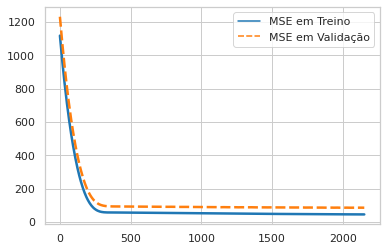

In [45]:
# Plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth  = 2.5)

In [46]:
# Previsões com o modelo treinado
previsoes = modelo.predict(x_teste).flatten()

In [47]:
# Imprime as previsões
previsoes

array([21.04633 , 18.730762, 23.853592, 21.435112, 20.737583, 20.829063,
       24.425335, 21.989708, 21.19498 , 21.012024, 25.688892, 23.40763 ,
       21.395092, 22.750126, 23.247543, 21.715267, 26.780922, 23.339024,
       29.119358, 20.171558, 20.611801, 21.143524, 19.485466, 21.04633 ,
       19.2682  , 23.487679, 22.887344, 14.882925, 17.61586 , 34.602386,
       21.600918, 18.576391, 20.2173  , 22.824451, 31.114742, 24.242378,
       21.898224, 27.758606, 25.597412, 31.743664, 27.352665, 30.228542,
       31.617882, 17.61586 , 23.070301, 23.270412, 18.696457, 23.527699,
       36.483425, 34.733883, 18.507782, 34.156425, 30.691654, 25.746067,
       23.61346 , 22.824451, 25.946175, 27.587082, 24.625446, 24.265247,
       23.173214, 19.353966, 23.396194, 22.83017 , 21.235004, 20.423126,
       21.360786, 22.235554, 21.749573, 21.66381 , 26.832378, 24.734077,
       11.692591, 14.619923, 17.535816, 23.339024, 17.896017, 18.341978,
       23.373325, 21.612354, 20.428844, 25.786087, 

# Fim

### Obrigado

### Visite o Blog da Data Science Academy - <a href="http://blog.dsacademy.com.br">Blog DSA</a>